In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tigro.classes.parser import Parser

from tigro.io.load import load_phmap
from tigro.core.process import filter_phmap
from tigro.utils.util import get_threshold
from tigro.core.process import med_phmap
from tigro.core.fit import fit_ellipse
from tigro.core.process import register_phmap
from tigro.utils.util import get_uref
from tigro.plots.plot import plot_sag
from tigro.core.fit import fit_zernike
from tigro.io.save import to_pickle
from tigro.plots.plot import plot_allpolys
from tigro.plots.plot import plot_polys
from tigro.io.load import from_pickle
from tigro.utils.util import get_diff_idx
from tigro.core.process import zerog_phmap
from tigro.plots.plot import plot_zerog
from tigro.core.process import delta_phmap
from tigro.plots.plot import plot_map

from tigro import logger

In [3]:
config = "/export/NAS/ariel/data/andrea.bocchieri/TIGRO/input/config.ini"
outpath = "/home/ariel/andrea.bocchieri/DATA/Optics/TA/arcetri/tigro_output"
pp = Parser(config, outpath)
logger.setLevel(pp.loglevel)

2024-07-29 20:32:17,106 - tigro - INFO - Initializing parser
2024-07-29 20:32:17,109 - tigro - DEBUG - Config file read
2024-07-29 20:32:17,110 - tigro - DEBUG - General parameters read
2024-07-29 20:32:17,111 - tigro - DEBUG - CGVT parameters read
2024-07-29 20:32:17,112 - tigro - DEBUG - CGVT plots options read
2024-07-29 20:32:17,113 - tigro - DEBUG - Zerog plots options read


In [4]:
pp.__dict__

{'config': '/export/NAS/ariel/data/andrea.bocchieri/TIGRO/input/config.ini',
 'cparser': <configparser.ConfigParser at 0x7fb75c0f3c40>,
 'project': 'Template',
 'comment': 'Template for the configuration file',
 'version': '1.0',
 'datapath': '/export/NAS/ariel/data/ariel_user/TA/M1-SM/formatted_data',
 'outpath': '/home/ariel/andrea.bocchieri/DATA/Optics/TA/arcetri/tigro_output',
 '_sequence_ids': '237-248, 261-272',
 'sequence_ids': array([237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 261,
        262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272]),
 'n_zernike': 15,
 'store_phmap': False,
 'fname_phmap': '/home/ariel/andrea.bocchieri/DATA/Optics/TA/arcetri/tigro_output/tigro.pkl',
 'loglevel': 'DEBUG',
 'run_cgvt': True,
 '_phmap_filter_type': 'mean',
 'phmap_filter_type': <numpy.ma.core._frommethod at 0x7fb74c1bd780>,
 'phmap_semi_major': 451,
 'phmap_semi_minor': 310,
 'phmap_seq_ref': 237,
 'plot_regmap': True,
 'plot_regmap_imkey': 237,
 'plot_regmap_no_pttf': 

### CGVT

In [5]:
logger.info("Running CGVT")

2024-07-29 20:32:17,284 - tigro - INFO - Running CGVT


In [6]:
logger.info("Loading phase maps")
phmap = load_phmap(pp.datapath, pp.sequence_ids)

2024-07-29 20:32:17,308 - tigro - INFO - Loading phase maps
2024-07-29 20:32:17,327 - tigro - DEBUG - Loading files ...
2024-07-29 20:32:17,363 - tigro - DEBUG - 237 010 20240709 237_10_20240709_M1-g ['M1-g']
2024-07-29 20:32:17,374 - tigro - DEBUG - 237 011 20240709 237_11_20240709_M1-g ['M1-g']


2024-07-29 20:32:17,385 - tigro - DEBUG - 237 012 20240709 237_12_20240709_M1-g ['M1-g']
2024-07-29 20:32:17,397 - tigro - DEBUG - 237 013 20240709 237_13_20240709_M1-g ['M1-g']
2024-07-29 20:32:17,409 - tigro - DEBUG - 237 014 20240709 237_14_20240709_M1-g ['M1-g']
2024-07-29 20:32:17,419 - tigro - DEBUG - 237 015 20240709 237_15_20240709_M1-g ['M1-g']
2024-07-29 20:32:17,430 - tigro - DEBUG - 237 016 20240709 237_16_20240709_M1-g ['M1-g']
2024-07-29 20:32:17,441 - tigro - DEBUG - 237 017 20240709 237_17_20240709_M1-g ['M1-g']
2024-07-29 20:32:17,453 - tigro - DEBUG - 237 018 20240709 237_18_20240709_M1-g ['M1-g']
2024-07-29 20:32:17,464 - tigro - DEBUG - 237 019 20240709 237_19_20240709_M1-g ['M1-g']
2024-07-29 20:32:17,472 - tigro - DEBUG - 237 001 20240709 237_1_20240709_M1-g ['M1-g']
2024-07-29 20:32:17,483 - tigro - DEBUG - 237 020 20240709 237_20_20240709_M1-g ['M1-g']
2024-07-29 20:32:17,493 - tigro - DEBUG - 237 021 20240709 237_21_20240709_M1-g ['M1-g']
2024-07-29 20:32:17,50

In [7]:
phmap[237].keys()

dict_keys(['rawmap', 'number', 'name', 'phi_offs'])

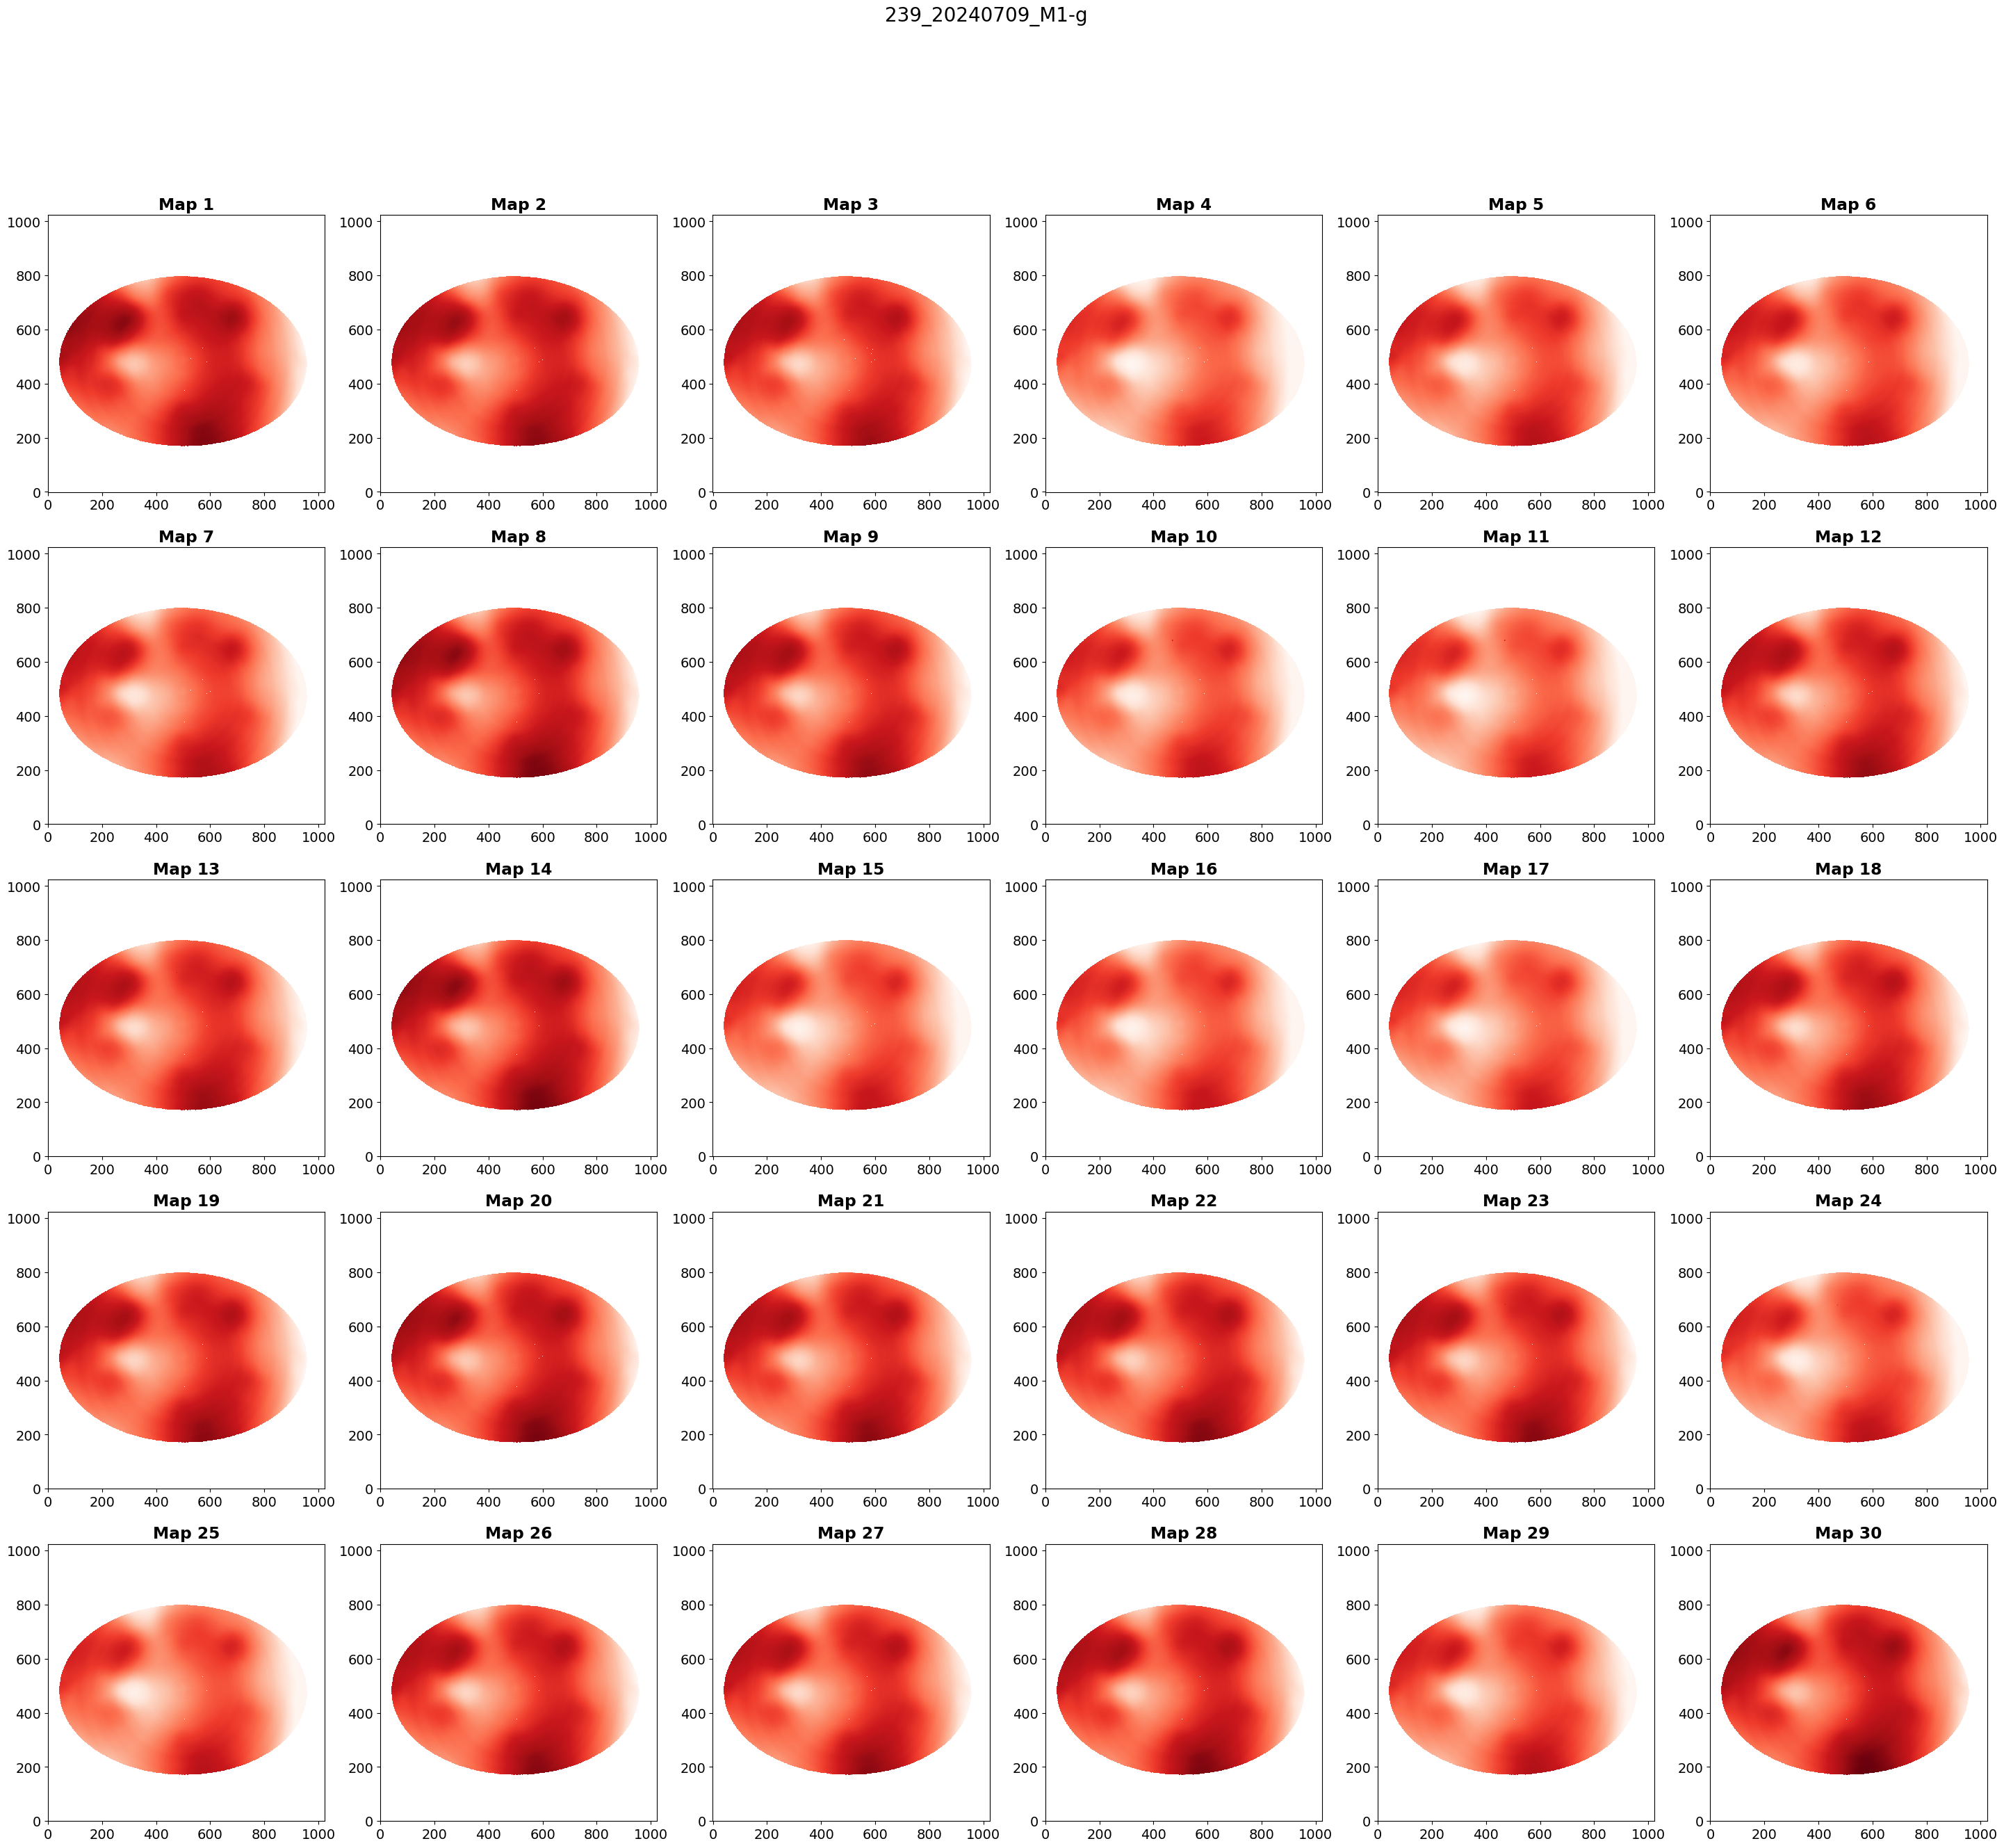

In [9]:
from tigro.plots.plot import plot_sag_quicklook

_ = plot_sag_quicklook(phmap, 239)

In [7]:
logger.info("Filtering phase maps")
phmap = filter_phmap(phmap)

2024-07-24 15:10:16,981 - tigro - INFO - Filtering phase maps
2024-07-24 15:10:16,983 - tigro - DEBUG - Filter sequence...
2024-07-24 15:10:16,984 - tigro - DEBUG - 237


2024-07-24 15:10:22,122 - tigro - DEBUG - 238
2024-07-24 15:10:27,109 - tigro - DEBUG - 239
2024-07-24 15:10:32,090 - tigro - DEBUG - 240
2024-07-24 15:10:37,005 - tigro - DEBUG - 241
2024-07-24 15:10:41,932 - tigro - DEBUG - 242
2024-07-24 15:10:46,883 - tigro - DEBUG - 243
2024-07-24 15:10:51,683 - tigro - DEBUG - Sequence 243 rotated
2024-07-24 15:10:51,684 - tigro - DEBUG - 244
2024-07-24 15:10:56,561 - tigro - DEBUG - Sequence 244 rotated
2024-07-24 15:10:56,564 - tigro - DEBUG - 245
2024-07-24 15:11:01,434 - tigro - DEBUG - Sequence 245 rotated
2024-07-24 15:11:01,435 - tigro - DEBUG - 246
2024-07-24 15:11:06,353 - tigro - DEBUG - Sequence 246 rotated
2024-07-24 15:11:06,357 - tigro - DEBUG - 247
2024-07-24 15:11:11,236 - tigro - DEBUG - Sequence 247 rotated
2024-07-24 15:11:11,238 - tigro - DEBUG - 248
2024-07-24 15:11:16,099 - tigro - DEBUG - Sequence 248 rotated
2024-07-24 15:11:16,100 - tigro - DEBUG - 261
2024-07-24 15:11:21,038 - tigro - DEBUG - 262
2024-07-24 15:11:25,964 

2024-07-24 15:12:15,443 - tigro - INFO - Getting threshold for outlier rejection


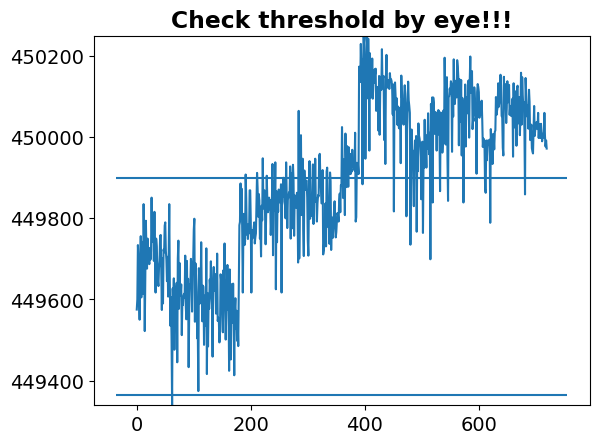

In [8]:
logger.info("Getting threshold for outlier rejection")
threshold = get_threshold(phmap)

In [9]:
logger.info("Computing median map and supermask")
phmap = med_phmap(
    phmap,
    threshold,
    filter_type=pp.phmap_filter_type,
)

2024-07-24 15:12:16,279 - tigro - INFO - Computing median map and supermask


In [10]:
logger.info("Fitting ellipse to phase maps")
phmap = fit_ellipse(phmap)

2024-07-24 15:12:25,172 - tigro - INFO - Fitting ellipse to phase maps
2024-07-24 15:12:25,189 - tigro - DEBUG - 237 (498.3 481.2) 456.8 313.3 -0.8
2024-07-24 15:12:25,206 - tigro - DEBUG - 238 (498.3 481.2) 456.8 313.2 -0.8
2024-07-24 15:12:25,222 - tigro - DEBUG - 239 (498.3 481.1) 456.7 313.2 -0.8
2024-07-24 15:12:25,238 - tigro - DEBUG - 240 (498.2 481.3) 456.7 313.2 -0.8
2024-07-24 15:12:25,254 - tigro - DEBUG - 241 (498.3 481.3) 456.7 313.3 -0.8
2024-07-24 15:12:25,270 - tigro - DEBUG - 242 (498.2 481.3) 456.7 313.3 -0.8
2024-07-24 15:12:25,285 - tigro - DEBUG - 243 (525.7 530.1) 456.8 313.3 -0.9


2024-07-24 15:12:25,302 - tigro - DEBUG - 244 (525.8 530.2) 456.8 313.5 -0.9
2024-07-24 15:12:25,318 - tigro - DEBUG - 245 (525.6 530.2) 456.6 313.5 -0.9
2024-07-24 15:12:25,332 - tigro - DEBUG - 246 (525.6 530.2) 456.6 313.5 -0.9
2024-07-24 15:12:25,348 - tigro - DEBUG - 247 (525.9 530.2) 456.7 313.5 -0.9
2024-07-24 15:12:25,363 - tigro - DEBUG - 248 (525.6 530.2) 456.6 313.6 -0.9
2024-07-24 15:12:25,378 - tigro - DEBUG - 261 (500.3 500.6) 456.9 313.3 -0.0
2024-07-24 15:12:25,394 - tigro - DEBUG - 262 (500.2 500.5) 456.9 313.5 -0.0
2024-07-24 15:12:25,409 - tigro - DEBUG - 263 (500.2 500.5) 457.0 313.5 -0.0
2024-07-24 15:12:25,424 - tigro - DEBUG - 264 (500.2 500.5) 457.0 313.4 -0.0
2024-07-24 15:12:25,439 - tigro - DEBUG - 265 (499.9 500.2) 456.9 313.3 -0.1
2024-07-24 15:12:25,454 - tigro - DEBUG - 266 (499.8 500.0) 457.0 313.3 -0.0
2024-07-24 15:12:25,470 - tigro - DEBUG - 267 (527.6 533.6) 456.8 313.5 -0.3
2024-07-24 15:12:25,485 - tigro - DEBUG - 268 (527.6 533.6) 456.8 313.5 -0.3

In [11]:
logger.info("Registering phase maps")
phmap = register_phmap(phmap)

2024-07-24 15:12:25,577 - tigro - INFO - Registering phase maps


2024-07-24 15:12:25,861 - tigro - DEBUG - || seq:237 | dx: 13.69 dy: 30.79  ||
2024-07-24 15:12:26,132 - tigro - DEBUG - || seq:238 | dx: 13.70 dy: 30.84  ||
2024-07-24 15:12:26,405 - tigro - DEBUG - || seq:239 | dx: 13.71 dy: 30.86  ||
2024-07-24 15:12:26,678 - tigro - DEBUG - || seq:240 | dx: 13.80 dy: 30.74  ||
2024-07-24 15:12:26,951 - tigro - DEBUG - || seq:241 | dx: 13.66 dy: 30.69  ||
2024-07-24 15:12:27,226 - tigro - DEBUG - || seq:242 | dx: 13.81 dy: 30.71  ||
2024-07-24 15:12:27,516 - tigro - DEBUG - || seq:243 | dx:-13.74 dy:-18.09  ||
2024-07-24 15:12:27,805 - tigro - DEBUG - || seq:244 | dx:-13.82 dy:-18.18  ||
2024-07-24 15:12:28,073 - tigro - DEBUG - || seq:245 | dx:-13.64 dy:-18.20  ||
2024-07-24 15:12:28,324 - tigro - DEBUG - || seq:246 | dx:-13.63 dy:-18.23  ||
2024-07-24 15:12:28,575 - tigro - DEBUG - || seq:247 | dx:-13.87 dy:-18.16  ||
2024-07-24 15:12:28,825 - tigro - DEBUG - || seq:248 | dx:-13.60 dy:-18.24  ||
2024-07-24 15:12:29,062 - tigro - DEBUG - || seq:261

In [12]:
logger.info("Getting reference map")
uref = get_uref(
    phmap,
    pp.phmap_semi_major,
    pp.phmap_semi_minor,
    pp.phmap_seq_ref,
)

2024-07-24 15:12:31,795 - tigro - INFO - Getting reference map


2024-07-24 15:12:31,836 - tigro - INFO - Plotting sag of registered phase map


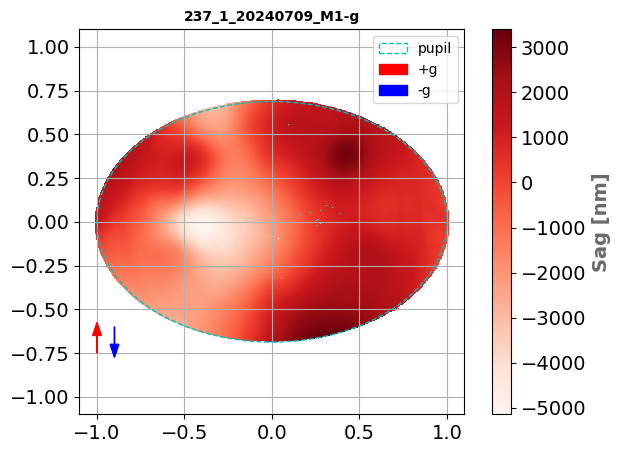

In [13]:
if pp.plot_regmap:
    logger.info("Plotting sag of registered phase map")
    plot_sag(
        phmap,
        uref,
        imkey=pp.plot_regmap_imkey,
        imsubkey="RegMap",
    )

In [14]:
logger.info("Fitting Zernike orthonormal polynomials")
phmap = fit_zernike(
    phmap,
    uref,
    NZernike=pp.n_zernike,
)

2024-07-24 15:12:32,145 - tigro - INFO - Fitting Zernike orthonormal polynomials
2024-07-24 15:12:32,147 - tigro - DEBUG - Calculating 15 Polys... 


2024-07-24 15:12:33,919 - tigro - DEBUG - ... done!
2024-07-24 15:12:33,920 - tigro - DEBUG - Fitting sequence n: ...
2024-07-24 15:12:33,921 - tigro - DEBUG - 237
2024-07-24 15:12:34,207 - tigro - DEBUG - 238
2024-07-24 15:12:34,492 - tigro - DEBUG - 239
2024-07-24 15:12:34,777 - tigro - DEBUG - 240
2024-07-24 15:12:35,066 - tigro - DEBUG - 241
2024-07-24 15:12:35,357 - tigro - DEBUG - 242
2024-07-24 15:12:35,645 - tigro - DEBUG - 243
2024-07-24 15:12:35,934 - tigro - DEBUG - 244
2024-07-24 15:12:36,224 - tigro - DEBUG - 245
2024-07-24 15:12:36,513 - tigro - DEBUG - 246
2024-07-24 15:12:36,803 - tigro - DEBUG - 247
2024-07-24 15:12:37,092 - tigro - DEBUG - 248
2024-07-24 15:12:37,382 - tigro - DEBUG - 261
2024-07-24 15:12:37,671 - tigro - DEBUG - 262
2024-07-24 15:12:37,961 - tigro - DEBUG - 263
2024-07-24 15:12:38,251 - tigro - DEBUG - 264
2024-07-24 15:12:38,540 - tigro - DEBUG - 265
2024-07-24 15:12:38,831 - tigro - DEBUG - 266
2024-07-24 15:12:39,120 - tigro - DEBUG - 267
2024-07-

2024-07-24 15:12:40,889 - tigro - INFO - Plotting sag of registered phase map, minus the Piston, Tip, Tilts and Defocus


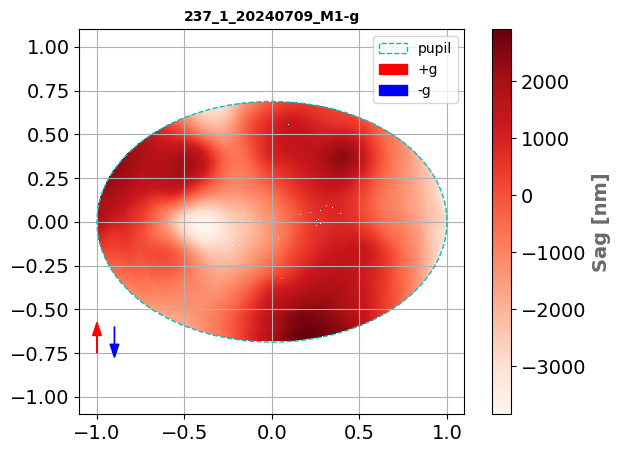

In [15]:
if pp.plot_regmap_no_pttf:
    logger.info(
        "Plotting sag of registered phase map, minus the Piston, Tip, Tilts and Defocus"
    )
    plot_sag(
        phmap,
        uref,
        imkey=pp.plot_regmap_no_pttf_imkey,
        imsubkey="RegMap-PTTF",
    )

In [16]:
if pp.store_phmap:
    logger.info("Saving results to pickle file")
    to_pickle(phmap, pp.outpath)

2024-07-24 15:12:41,215 - tigro - INFO - Plotting all polynomials


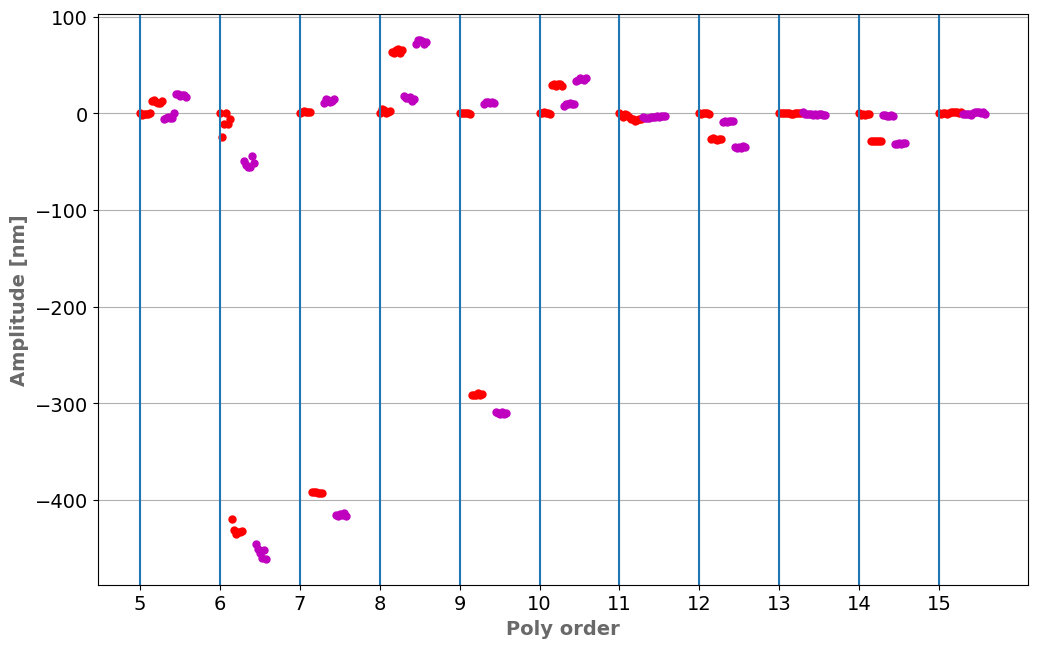

In [17]:
if pp.plot_allpolys:
    logger.info("Plotting all polynomials")
    plot_allpolys(
        phmap,
        sequence_ids=pp.sequence_ids,
        sequence_ref=pp.plot_allpolys_seq_ref,
        NZernike=pp.n_zernike,
        colors=pp.plot_allpolys_colors,
    )

2024-07-24 15:12:41,387 - tigro - INFO - Plotting subset of polynomials vs. sequence


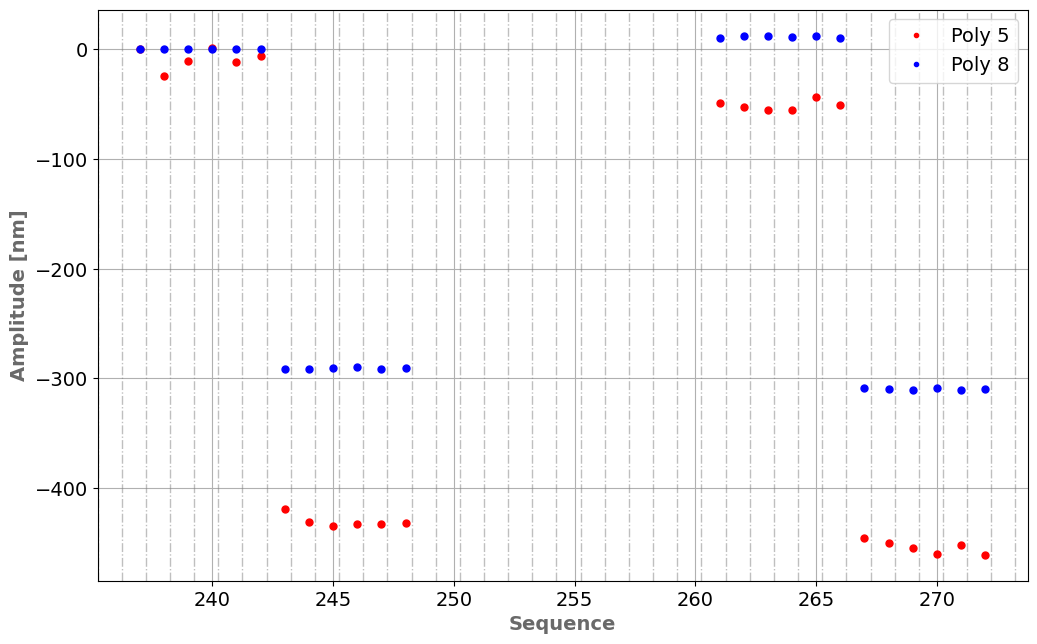

In [18]:
if pp.plot_polys:
    logger.info("Plotting subset of polynomials vs. sequence")
    plot_polys(
        phmap,
        sequence_ids=pp.sequence_ids,
        sequence_ref=pp.plot_polys_seq_ref,
        poly_order=pp.plot_polys_order,
        colors=pp.plot_polys_colors,
    )

### ZEROG

In [19]:
logger.info("Running ZeroG")

2024-07-24 15:12:41,587 - tigro - INFO - Running ZeroG


In [20]:
if not phmap:
    try:
        logger.info("Loading phase maps")
        phmap = from_pickle(pp.outpath)
    except FileNotFoundError:
        logger.error("File not found")

In [21]:
logger.info("Getting diff indices")
diff_idx = get_diff_idx(
    pp.zerog_idx0, pp.zerog_idx1, pp.zerog_colors
)

2024-07-24 15:12:41,642 - tigro - INFO - Getting diff indices


In [22]:
logger.info("ZeroG-ing phase maps")
medmap, zerogmap, coeff_med, cmed, rms, color = zerog_phmap(phmap, diff_idx)

2024-07-24 15:12:41,669 - tigro - INFO - ZeroG-ing phase maps


2024-07-24 15:12:42,668 - tigro - INFO - Plotting ZeroG results


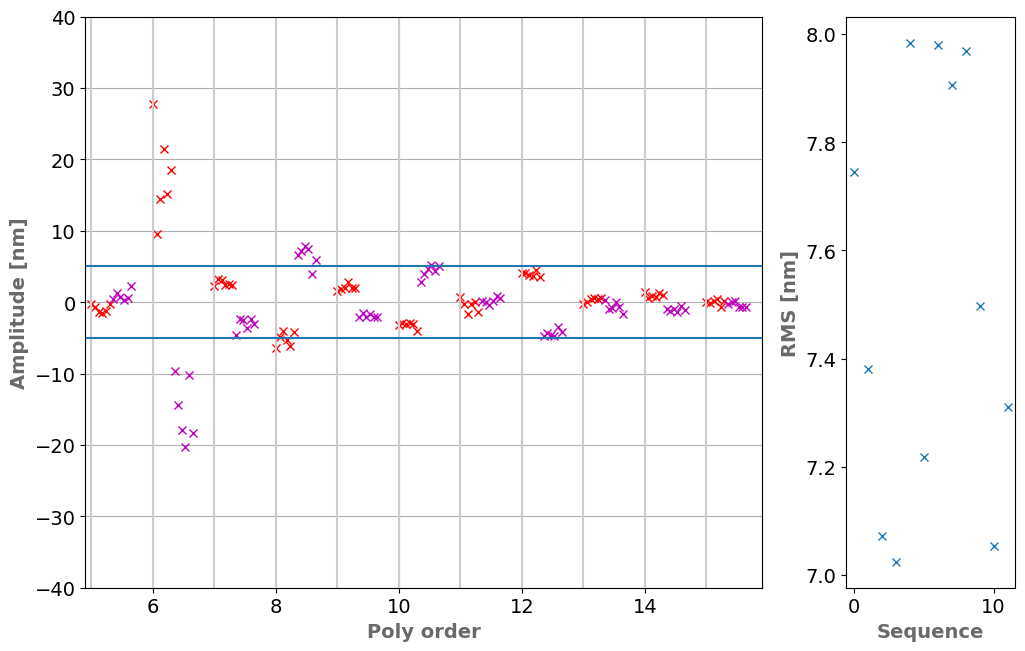

In [23]:
if pp.plot_zerog:
    logger.info("Plotting ZeroG results")
    plot_zerog(
        coeff_med,
        cmed,
        rms,
        color,
        pp.plot_zerog_ylim,
    )

In [24]:
logger.info("Computing delta phase map")
dphmap = delta_phmap(
    zerogmap,
    idx0=pp.dphmap_idx0,
    idx1=pp.dphmap_idx1,
    gain=pp.dphmap_gain,
    filter_type=pp.dphmap_filter_type,
)

2024-07-24 15:12:42,880 - tigro - INFO - Computing delta phase map


2024-07-24 15:12:43,056 - tigro - INFO - Plotting delta phase map


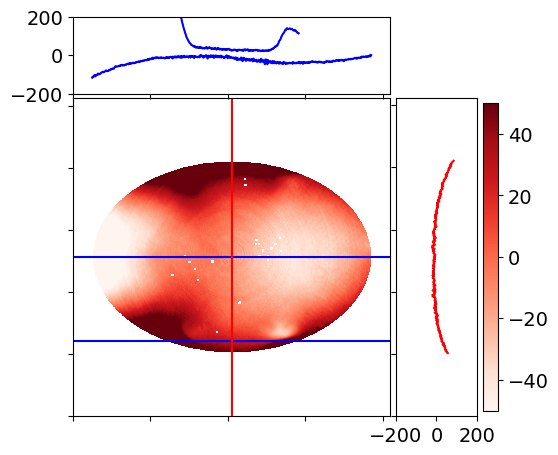

In [25]:
if pp.plot_dphmap:
    logger.info("Plotting delta phase map")

    plot_map(
        dphmap,
        hlines=pp.plot_dphmap_hlines,
        vlines=pp.plot_dphmap_vlines,
        hist_xlim=pp.plot_dphmap_hist_xlim,
        hist_ylim=pp.plot_dphmap_hist_ylim,
    )